In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Lab3')

In [ ]:
# импорт модулей
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from cf_matrix import make_confusion_matrix

In [ ]:
# загрузка датасета
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
# создание своего разбиения датасета
from sklearn.model_selection import train_test_split

# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=10000, 
                                                    train_size=50000, 
                                                    random_state=31)
# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (50000, 32, 32, 3)
Shape of y train: (50000, 1)
Shape of X test: (10000, 32, 32, 3)
Shape of y test: (10000, 1)


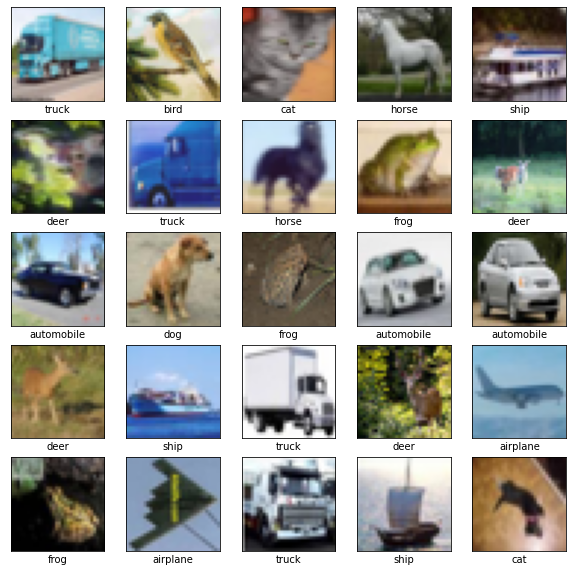

In [ ]:
# массив меток классов
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
 'dog', 'frog', 'horse', 'ship', 'truck']

# вывод изображений
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [ ]:
# зададим параметры данных и модели
num_classes = len(class_names)
input_shape = (32, 32, 3)

# приведение входных данных к диапазону [0, 1]
X_train = X_train / 255
X_test = X_test / 255

# переведем метки в one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('Shape of transformed X train:', X_train.shape)
print('Shape of transformed X test:', X_test.shape)
print('Shape of transformed y train:', y_train.shape)
print('Shape of transformed y test:', y_test.shape)

Shape of transformed X train: (50000, 32, 32, 3)
Shape of transformed X test: (10000, 32, 32, 3)
Shape of transformed y train: (50000, 10)
Shape of transformed y test: (10000, 10)


In [ ]:
# создаем модель
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)       

In [ ]:
# компилируем и обучаем модель
batch_size = 128
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
352/352 [==============================] - 71s 199ms/step - loss: 1.7498 - accuracy: 0.3483 - val_loss: 1.4327 - val_accuracy: 0.4706
Epoch 2/10
352/352 [==============================] - 72s 203ms/step - loss: 1.3999 - accuracy: 0.4925 - val_loss: 1.2294 - val_accuracy: 0.5680
Epoch 3/10
352/352 [==============================] - 72s 204ms/step - loss: 1.2705 - accuracy: 0.5443 - val_loss: 1.1059 - val_accuracy: 0.6102
Epoch 4/10
352/352 [==============================] - 71s 202ms/step - loss: 1.1691 - accuracy: 0.5827 - val_loss: 1.0267 - val_accuracy: 0.6404
Epoch 5/10
352/352 [==============================] - 72s 204ms/step - loss: 1.1051 - accuracy: 0.6076 - val_loss: 0.9630 - val_accuracy: 0.6674
Epoch 6/10
352/352 [==============================] - 68s 194ms/step - loss: 1.0429 - accuracy: 0.6299 - val_loss: 0.9870 - val_accuracy: 0.6526
Epoch 7/10
352/352 [==============================] - 67s 192ms/step - loss: 0.9983 - accuracy: 0.6494 - val_loss: 0.9797 - val_ac

In [ ]:
# оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 [==============================] - 6s 20ms/step - loss: 0.8662 - accuracy: 0.6941
Loss on test data: 0.8661637902259827
Accuracy on test data: 0.694100022315979


1/1 [==============================] - 0s 104ms/step
NN output: [[0.4832997  0.01237398 0.31136426 0.01045817 0.06581496 0.00403226
  0.0020063  0.00414176 0.0992062  0.00730238]]


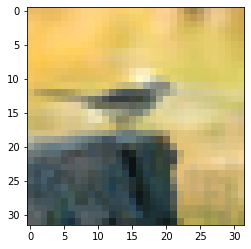

Real mark:  bird
NN answer:  airplane
1/1 [==============================] - 0s 26ms/step
NN output: [[5.1394734e-03 8.4536703e-05 2.6192494e-05 1.4815607e-05 3.6893085e-05
  8.8267916e-07 7.2837952e-07 1.5493541e-06 9.9197924e-01 2.7156470e-03]]


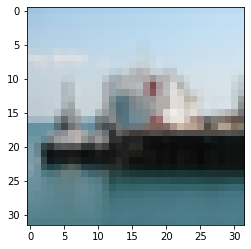

Real mark:  ship
NN answer:  ship


In [ ]:
# вывод тестового изображения и результата распознавания
n = 31
for i in range(2):
  plt.figure(figsize=(4,4))
  result = model.predict(X_test[n+i:n+i+1])
  print('NN output:', result)
  plt.imshow(X_test[n+i].reshape(32,32,3))
  plt.show()
  print('Real mark: ', class_names[np.argmax(y_test[n+i])])
  print('NN answer: ', class_names[np.argmax(result)])

По первому изображению видим, что птица распозналась как самолет. Это можно объяснить тем, что тело птицы, действительно, по форме напоминает самолет. Второе же изображение распознано верно.

313/313 [==============================] - 6s 18ms/step
              precision    recall  f1-score   support

    airplane       0.74      0.71      0.73      1004
  automobile       0.89      0.70      0.78       985
        bird       0.64      0.50      0.56       998
         cat       0.54      0.52      0.53       985
        deer       0.61      0.68      0.64       992
         dog       0.58      0.66      0.62       968
        frog       0.85      0.70      0.76      1010
       horse       0.74      0.76      0.75      1020
        ship       0.80      0.82      0.81      1002
       truck       0.64      0.88      0.74      1036

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



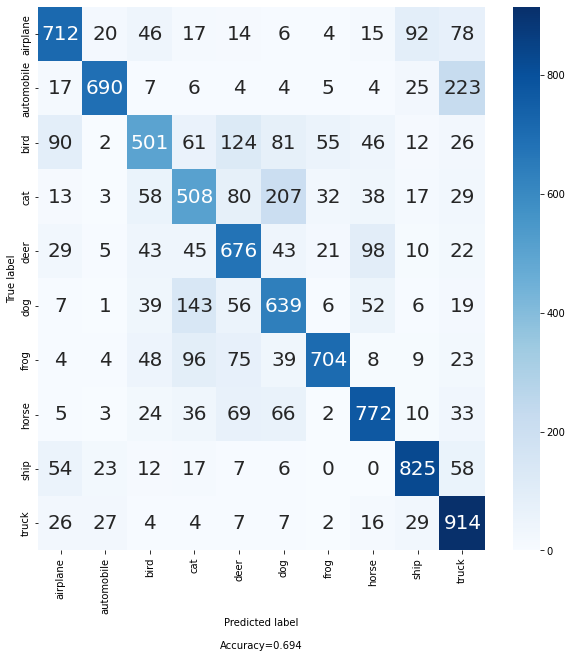

In [ ]:
# истинные метки классов
true_labels = np.argmax(y_test, axis=1)
# предсказанные метки классов
predicted_labels = np.argmax(model.predict(X_test), axis=1)

# отчет о качестве классификации
print(classification_report(true_labels, predicted_labels, target_names=class_names))
# вычисление матрицы ошибок
conf_matrix = confusion_matrix(true_labels, predicted_labels)
# красивая отрисовка матрицы ошибок в виде "тепловой карты"
make_confusion_matrix(conf_matrix, categories=class_names, percent=False, figsize=(10,10))

Рассчитанные показатели качества имеют не лучшие значения, так как было намеренно уменьшено количество эпох обучения, чтобы одно изображение из двух тестовых распознавалось неверно.
Самые низкие значения precision имеют классы cat и dog. Это значит, что изображениям других классов часто присваивались метки кошей и собак.
Самые низкие значения recall имеют классы bird и cat. Это значит, что птицы и кошки часто определялись как другие изображения.
По выведенной матрице ошибок видим, что достаточно часто изображения класса automobile определяются как truck.